In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the Data to Pandas DataFrame

marks_data = pd.read_csv('D://Data Trained//Internship//Projects//Project Details//3rd_Practice phase/Student grades.csv')
marks_data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
#Rows and Columns details of the dataset

marks_data.shape

(571, 43)

In [4]:
#checking if any missing values/null values in the dataset

marks_data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [5]:
#Deleting the non-influencing column 'Seat No.'

marks_data = marks_data.drop(columns=['Seat No.'])
marks_data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
#Creating a function which can replace all the null values as a Grades Mode value of particular Row(Seat No.)

from scipy.stats import mode

def fill_missing(row):
    "It will fill the all missing values as per the the Mode value of related Row of the DataFrame"
    final_row = row.drop(labels=['CGPA']) if 'CGPA' in row.index else row
    row_mode = final_row.dropna().mode()
    if len(row_mode)>0:
        row.fillna(row_mode[0], inplace=True)
    return row

In [7]:
#Using the created function to fill the Null/Missing values in the Dataset

for row in range(len(marks_data)):
    row_mode = marks_data.iloc[row].drop(labels=['CGPA']).dropna().mode()
    if not row_mode.empty:
        marks_data.iloc[row]= marks_data.iloc[row].fillna(row_mode[0])

In [8]:
#Checking for Null/Missing values again

marks_data.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [9]:
#checking no. of unique values in all the attributes

marks_data.nunique()

PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        14
MT-224        14
CS-210        14
CS-211        14
CS-203        14
CS-214        14
EE-217        13
CS-212        12
CS-215        14
MT-331        13
EF-303        12
HS-304        14
CS-301        13
CS-302        13
TC-383        13
MT-442        13
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        13
CS-403        13
CS-421        14
CS-406        14
CS-414        14
CS-419        13
CS-423        13
CS-412        14
CGPA         491
dtype: int64

In [10]:
#To view all the column wise unique values

for col in marks_data.columns:
    unique_values = marks_data[col].unique()
    print(f"Unique values in '{col}': {sorted(unique_values)}")

Unique values in 'PH-121': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique values in 'HS-101': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F']
Unique values in 'CY-105': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique values in 'HS-105/12': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique values in 'MT-111': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique values in 'CS-105': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+']
Unique values in 'CS-106': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique values in 'EL-102': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique values in 'EE-119': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'WU']
Unique values in 'ME-107': ['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F', 'WU']
Unique va

In [11]:
#Encoding all the non-integer values into integer values & separating labeled data to prepare the dataset for model training

x_para = marks_data.loc[:, marks_data.columns != 'CGPA'] = marks_data.loc[:, marks_data.columns != 'CGPA'].applymap(
                                    lambda x:0 if x=='A+' else
                                     1 if x == 'A' else
                                     2 if x == 'A-' else
                                     3 if x == 'B+' else
                                     4 if x == 'B' else
                                     5 if x == 'B-' else
                                     6 if x == 'C+' else
                                     7 if x == 'C' else
                                     8 if x == 'C-' else
                                     9 if x == 'D+' else
                                     10 if x == 'D' else
                                     11 if x == 'F' else
                                     12 if x == 'I' else
                                     13 if x == 'W' else
                                     14 if x == 'WU' else 15)

In [12]:
x_para.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,9,8,7,8,9,10,8,5,8,...,7,8,8,8,8,2,1,8,4,2
1,1,10,9,10,5,7,10,1,9,10,...,10,9,10,7,10,2,5,7,7,4
2,1,4,1,5,3,1,5,3,2,2,...,2,4,4,1,7,1,1,1,2,1
3,10,6,9,10,10,2,9,8,10,6,...,8,9,7,9,8,5,4,6,6,6
4,2,2,2,3,1,1,2,3,1,2,...,2,5,3,3,5,2,1,2,2,1


In [13]:
#Generating the dataset with all integer values

marks_data = pd.concat([x_para, marks_data[['CGPA']]], axis=1)

In [14]:
marks_data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,9,8,7,8,9,10,8,5,8,...,8,8,8,8,2,1,8,4,2,2.205
1,1,10,9,10,5,7,10,1,9,10,...,9,10,7,10,2,5,7,7,4,2.008
2,1,4,1,5,3,1,5,3,2,2,...,4,4,1,7,1,1,1,2,1,3.608
3,10,6,9,10,10,2,9,8,10,6,...,9,7,9,8,5,4,6,6,6,1.906
4,2,2,2,3,1,1,2,3,1,2,...,5,3,3,5,2,1,2,2,1,3.448


In [15]:
y_para = marks_data['CGPA'] #defining the labeled/targeted values
y_para

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [16]:
#Statistical details of the marksheet dataset

marks_data.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.00000,571.000000,571.000000,571.000000
mean,3.978984,5.190893,3.208406,4.369527,4.056042,3.005254,4.187391,4.103327,4.008757,4.943958,...,4.176883,5.015762,3.770578,5.611208,3.432574,2.872154,4.10683,4.257443,3.609457,2.954888
std,2.968770,2.724223,2.847652,3.125736,2.886206,2.500872,2.589096,2.987372,2.514853,3.074572,...,3.409773,2.718636,2.785598,2.695574,2.693121,2.524153,2.40558,2.774937,2.639746,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,4.000000,2.000000,1.000000,2.00000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.00000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,4.000000,4.000000,5.00000,6.000000,4.000000,3.451000
max,14.000000,11.000000,14.000000,14.000000,14.000000,10.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,3.985000


In [17]:
#general information of the data set

marks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int64  
 1   HS-101     571 non-null    int64  
 2   CY-105     571 non-null    int64  
 3   HS-105/12  571 non-null    int64  
 4   MT-111     571 non-null    int64  
 5   CS-105     571 non-null    int64  
 6   CS-106     571 non-null    int64  
 7   EL-102     571 non-null    int64  
 8   EE-119     571 non-null    int64  
 9   ME-107     571 non-null    int64  
 10  CS-107     571 non-null    int64  
 11  HS-205/20  571 non-null    int64  
 12  MT-222     571 non-null    int64  
 13  EE-222     571 non-null    int64  
 14  MT-224     571 non-null    int64  
 15  CS-210     571 non-null    int64  
 16  CS-211     571 non-null    int64  
 17  CS-203     571 non-null    int64  
 18  CS-214     571 non-null    int64  
 19  EE-217     571 non-null    int64  
 20  CS-212    

In [18]:
#Automatic outliers detaction and removal of outliers

iso_forest = IsolationForest(contamination=0.05) #removal of 5% of the outliers
y_pred =iso_forest.fit_predict(marks_data.select_dtypes(include=['float64', 'int64']))
outliers = y_pred == -1

mdfy_cleandata = marks_data[~outliers]

In [19]:
#Data Preprocessing to prepare for the machine learning model after outliers removal

x_para = mdfy_cleandata.drop(columns=['CGPA'])
y_para = mdfy_cleandata['CGPA']

In [20]:
x_para

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,9,8,7,8,9,10,8,5,8,...,7,8,8,8,8,2,1,8,4,2
2,1,4,1,5,3,1,5,3,2,2,...,2,4,4,1,7,1,1,1,2,1
3,10,6,9,10,10,2,9,8,10,6,...,8,9,7,9,8,5,4,6,6,6
4,2,2,2,3,1,1,2,3,1,2,...,2,5,3,3,5,2,1,2,2,1
5,1,5,4,9,6,2,6,4,3,3,...,3,7,5,6,6,2,2,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,4,1,1,2,0,1,2,2,0,3,...,3,2,2,1,1,1,3,3,4,1
567,0,1,1,1,1,1,1,2,1,1,...,2,3,3,1,1,2,4,2,7,2
568,4,1,2,3,1,1,1,1,1,4,...,3,2,4,1,3,1,7,3,2,2
569,1,3,10,1,10,9,5,8,5,8,...,3,10,4,4,8,10,7,4,5,7


In [21]:
y_para

0      2.205
2      3.608
3      1.906
4      3.448
5      3.026
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 542, dtype: float64

In [22]:
#Splitting the preprocessed data into train and test data with label/target datas

x_para_train, x_para_test, y_para_train, y_para_test = train_test_split(x_para, y_para, test_size=0.2, random_state=2)

In [23]:
print(x_para.shape, x_para_train.shape, x_para_test.shape)

(542, 41) (433, 41) (109, 41)


In [24]:
#Loading the data into model for model training

#here using DecisionTreeRegressor to predict

tree_model = DecisionTreeRegressor(max_depth=7)
tree_model.fit(x_para_train, y_para_train)

DecisionTreeRegressor(max_depth=7)

In [25]:
#Model evaluation & Metrics on Training data

y_pred_train = tree_model.predict(x_para_train)

mse_train = mean_squared_error(y_para_train, y_pred_train)
r2_train = r2_score(y_para_train, y_pred_train)

print(mse_train)
print(r2_train)

0.005572097469216696
0.9820244566687208


In [26]:
#Model evaluation & Metrics on Testing data

y_pred_test = tree_model.predict(x_para_test)

mse_test = mean_squared_error(y_para_test, y_pred_test)
r2_test = r2_score(y_para_test, y_pred_test)

print(mse_test)
print(r2_test)

0.04733389481461801
0.8639934419586998


In [27]:
#Prediction system for any one of the row from given data

input_data = x_para.iloc[int(input('Select the Raw number from the data: '))].to_numpy()
input_data_array = np.asarray(input_data)
reshape_input_data = input_data_array.reshape(1,-1)

predict_input = tree_model.predict(reshape_input_data)
print(f'The predicted CGPA is = {predict_input[0]}')

Select the Raw number from the data: 4
The predicted CGPA is = 3.0042999999999997


C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


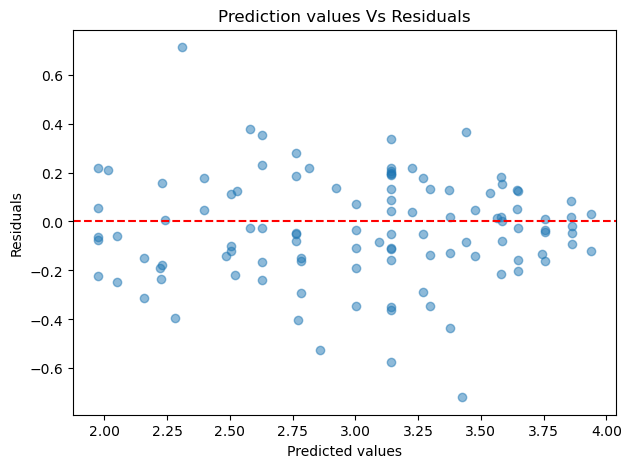

In [28]:
#Visualizing the Residual structure with reference to the Predicted values 

residuals = y_para_test - y_pred_test

plt.figure(figsize=(7,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Prediction values Vs Residuals')
plt.show()

In [29]:
#Cross-validation technique to evaluate model performance on 5 fold testing (4 split for training and 1 for testing)

c_model = LinearRegression()
scores = cross_val_score(c_model, x_para, y_para, cv=5)

print('Cross validation scores are: ', scores) #to print all 5 test fold scores
print('Mean score is: ', scores.mean()) #to print the mean value of all the cross validation technique evaluation

Cross validation scores are:  [0.98938547 0.99041679 0.98971193 0.99406731 0.98977974]
Mean score is:  0.9906722489340163


In [30]:
#CONCLUSION:

#The R2 value from training data and testing data is almost near to 1 which indicates the Good performance of the model I have applied.

#The lower MSE values of training & testing data can be considered as good performance of the model.

#The Residuals are mostly scattered around 0, which is ensuring the the best suitability of the Model for the given data.

#The mean score of values from Cross-validation evaluation is almost 1 which indicates the best performance of the model.